# Deep Learning week - Day 1 - Exercise 3

You just defined and run your first neural network for a two-class classification problem. What if there are more than two classes? This notebook is a multiclass classification task : based on the input data $x$, tells whether the sample belongs to the first, second, third, ... category.

# Create the data


The `make_blob` function [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) enables to draw : 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

There is also the `random_state` argument that allows to draw the data deterministically, in order to reproduce the same data. Two persons that choose the same random_state will have the same data.

❓ **Question** ❓ Based on the documentation, generate data with : 
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

Select a `random_state` equal to 1.

Print the shape and check that it corresponds to (1200, 8) for `X` and (1200) for `y`


In [1]:
from sklearn.datasets import make_blobs

##############
### Answer ###
##############

X, y = make_blobs(n_samples=1200, centers=7, n_features=8, cluster_std=8, random_state=1)
X.shape, y.shape

((1200, 8), (1200,))

❓ **Question** ❓ Thanks to matplotlib, plot two (arbitrary) dimensions of the input data. Each dot should be colored by the category it belongs to.

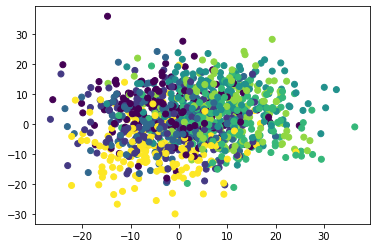

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

##############
### Answer ###
##############

plt.scatter(X.T[0], X.T[1], c=y)
plt.show()

❓ **Question** ❓ Repeat the operation on other dimensions, to visualy that the data are not easily separable

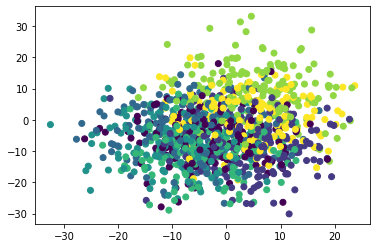

In [3]:
##############
### Answer ###
##############

plt.scatter(X.T[3], X.T[6], c=y)
plt.show()

As for now, `y` is the list of integers, each correspoding to the category of the related input data.
It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

However, for categorical task in Keras, the output should have a number of columns equal to the number of different categories. Each row, corresponding to an input data, is a list of the probabilities that this input belongs to the corresponding category. AS here, the probabilities to belong to each category is equal to 1, it should look like

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

Each column corresponds to a category. Each row corresponds to a target, the 1 being the category the input data belongs to.

To transform `y` to categories, use `to_categorical` function from Keras . 


❓ **Question** ❓ First print `y`, then apply it and store it into `y_cat` and reprint `y_cat` to see the new structure.

In [9]:
from tensorflow.keras.utils import to_categorical

##############
### Answer ###
##############

print(y)

y_cat = to_categorical(y)

print(y_cat)

[2 2 5 ... 1 3 0]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


❓ **Question** ❓ Split the dataset $X$ and $y_cat$  into a train and test set (size: 70/30%)

Remark : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [5]:
##############
### Answer ###
##############

n_train = int(0.7*len(X))

X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y_cat[:n_train], y_cat[n_train:]

For technical reasons, the data should be rescaled, so that the data are _approximately_ all in [-1, 1].
To do so, the `StandardScaler` function from Scikit-Learn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) allows to do that easily.

[Advanced notion] The technical reason for this rescaling will be seen during the week ;)

The function should be applied as 
```
SScaler = StandardScaler()
SScaler.fit(X)             ### Used to fit the coefficients of the standardisation
X = SScaler.transform(X)   ### Used to rescale X
```

❓ **Question** ❓ Given that you splited you dataset into `X_train` and `X_test`, how would you perform this task? 

In [6]:
from sklearn.preprocessing import StandardScaler

##############
### Answer ###
##############

SScaler = StandardScaler()
SScaler.fit(X_train)

X_train = SScaler.transform(X_train)
X_test = SScaler.transform(X_test)


❓ **Question** ❓ Complete the following function to initialize a model that has 
- a first layer with 50 neurons (activation being `relu` and appropriate input dimension)
- a output layer designed for a multiclassification task which outputs probabilities for each class

Hint: the last layer will look like : `model.add(layers.Dense(SOME_NUMBER, activation='softmax'))`

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
def initialize_model():
    
    ### Model architecture
    # To complete
    # To complete
    # To complete
    
    ### Model optimization : Optimizer, loss and metric 
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model 

### Note here that the loss is different! This is because the task is not with two categories only, therefore
### the solver is somehow different (will see it tomorrow)

model = initialize_model()

In [10]:
##############
### Answer ###
##############

def initialize_model():
    ### Model architecture
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=8))
    model.add(layers.Dense(7, activation='softmax'))
    
    ### Model optimization : Optimizer, loss and metric 
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model 

### Note here that the loss is different! This is because the task is not with two categories only, therefore
### the solver is somehow different (will see it tomorrow)

model = initialize_model()

❓ **Question** ❓ How many parameters (a.k.a. weights) are there in the model? How many a logistic regression would have had with the same data?

In [11]:
##############
### Answer ###
##############

model.summary()

# A logistic model would have had 8 weights + 1 intercept = 9 parameters 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Question** ❓ Fit your model onto the train data with 50 epochs and plot the history

In [13]:
##############
### Answer ###
##############
    
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=16, 
                    verbose=0)

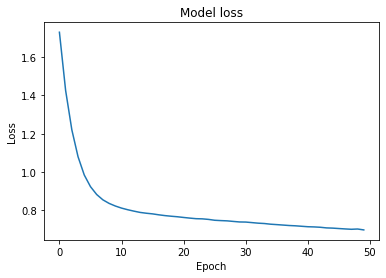

In [14]:
##############
### Answer ###
##############

def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_history(history)

❓ **Question** ❓ Evaluate your model on the test set and print the accuracy

In [15]:
results = model.evaluate(X_test, y_test, verbose=0)
print(results[1])

0.7361111044883728


❓ **Question** ❓ Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give?

In [ ]:
##############
### Answer ###
##############

### A random guess would have a score of 1 out of 7 ~ 15%. Therefore the previous score seems ok

❗ **Remark** ❗ Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stopping it so soon? Let's rerun the model (with the initialization first) with 2000 epochs and plot the history

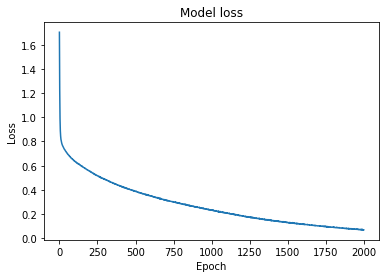

In [16]:
##############
### Answer ###
##############
    
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=16, 
                    verbose=0)

plot_history(history)

❓ **Question** ❓ What can you say about the new loss? 

❓ **Question** ❓ Evaluate once again your model on the test set and print the accuracy

In [17]:
results = model.evaluate(X_test, y_test, verbose=0)
print(results[1])

0.5805555582046509


❗ **Remark** ❗ On the one hand, the loss (computed on the train set) seems smaller than with 50 epochs. However, the accuracy on the test set got worse than before... 

❓ **Question** ❓ How is phenomenon called? 

In [ ]:
##############
### Answer ###
##############

### We are in the presence of overfitting : the loss gets better on the train set, but worse on the test set. 
### This is due to a lack of generalization of the model.

❗ **Remark** ❗ The overfitting occurs at some point during the iterations, once the accuracy starts getting worse on the test set. Therefore, there is a need to stop the model at some point : we will see how to do that tomorrow.

Nevertheless, we will see what happends in practice.

❓ **Question** ❓ Run the following command and plot the history

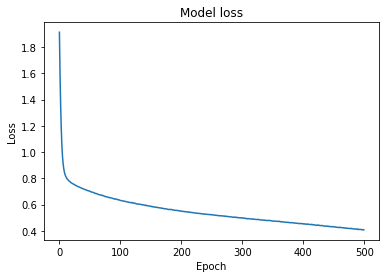

In [19]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=16,
                    verbose=0)
plot_history(history)

❓ **Question** ❓ Plot the values of the loss and accuracy on the train set (in blue) and on the test set (in orange). What can you comment on that?

In [20]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

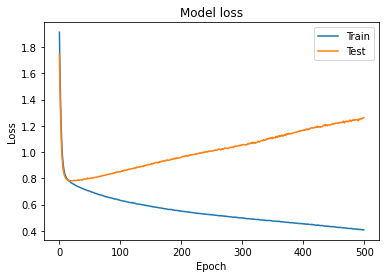

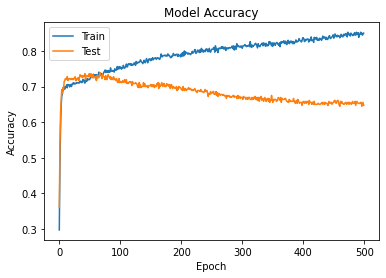

In [21]:
##############
### Answer ###
##############

plot_loss_accuracy(history)

❓ **Question** ❓ Reproduce similar results by defining a new architecture that includes : 

- a first layer with 25 neurons 
- a second layer with 15 neurons
- a third layer with 10 neurons
- a final layer that outputs probability for each class



In [ ]:
def initialize_model_2():
    
    # To complete entirely

In [22]:
##############
### Answer ###
##############

def initialize_model_2():
    
    model = models.Sequential()
    model.add(layers.Dense(25, activation='relu', input_dim=8))
    model.add(layers.Dense(15, activation='relu', input_dim=8))
    model.add(layers.Dense(10, activation='relu', input_dim=8))
    model.add(layers.Dense(7, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model  



❓ **Question** ❓ Fit this model with the previous data and look at the loss and accuracy through the iterations

Hint : select a high enough epoch number to see the overfitting happening.

In [23]:
##############
### Answer ###
##############

model = initialize_model_2()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=16,
                    verbose=0)

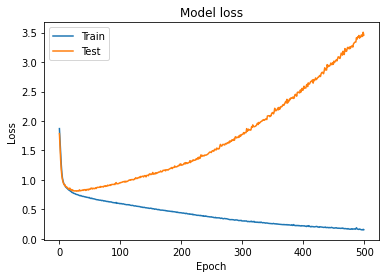

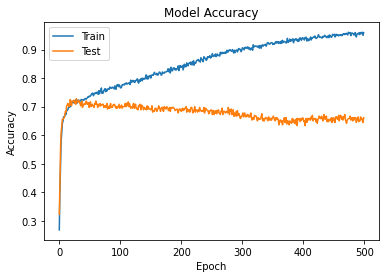

In [24]:
##############
### Answer ###
##############

plot_loss_accuracy(history)

❗ **Remark 1** ❗ We clearly see that an overfitting can happend during the training. Tomorrow, we will see how to preven the algorithm from overfitting. 

❗ **Remark 2** ❗ The model overfits as the number of parameters is very very large (compare the number of weights with a logistic regression on the same data)